In [1]:
import scanpy as sc
import scFates as scf

In [2]:
adata = sc.read("adata_tree.h5ad")

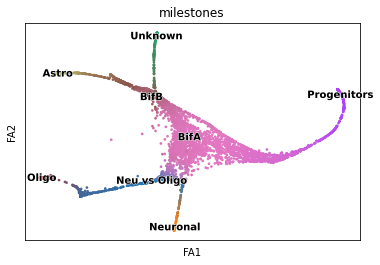

In [3]:
scf.pl.milestones(adata,annotate=True)

In [4]:
root="Progenitors"
miles=["Astro","Oligo"]

In [26]:
scf.tl.test_fork(adata,root,miles,n_jobs=40,rescale=True)

testing fork
    single mapping
    Differential expression: 100%|██████████| 1700/1700 [00:50<00:00, 33.86it/s]
    test for upregulation for each leave vs root
    upreg Oligo: 100%|██████████| 801/801 [00:01<00:00, 523.08it/s]
    finished (0:00:54) --> added 
    .uns['Progenitors->Astro<>Oligo']['fork'], DataFrame with fork test results.


In [38]:
scf.tl.branch_specific(adata,root,miles,effect=.8)

    branch specific features: Oligo: 34, Astro: 19
    finished --> updated 
    .uns['Progenitors->Astro<>Oligo']['fork'], DataFrame updated with additionnal 'branch' column.


In [39]:
scf.tl.activation(adata,root,miles,n_jobs=20,)

testing activation
    to Oligo: 100%|██████████| 34/34 [00:00<00:00, 42.20it/s]
    threshold pseudotime is: 2.0167335747489856
    13 early and 6 late features specific to leave Astro
    13 early and 21 late features specific to leave Oligo
    finished (0:00:01) --> updated 
    .uns['Progenitors->Astro<>Oligo']['fork'], DataFrame updated with additionnal 'activation' and 'module' columns.


In [29]:
#sc.pp.neighbors(adata,n_neighbors=15,use_rep="X_diffusion_multiscale")

In [40]:
import scvelo as scv

In [41]:
from scvelo.preprocessing.neighbors import get_connectivities

In [33]:
adata.layers["knn_smoothed"]=get_connectivities(adata).dot(adata.X)

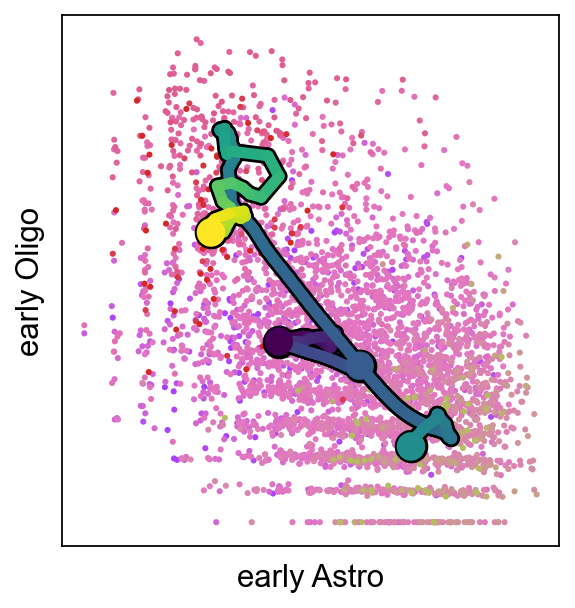

In [42]:
sc.set_figure_params()
scf.pl.modules(adata,root,miles,show_traj=True,module="early")

In [43]:
scf.tl.slide_cells(adata,root,miles,win=100)

--> added 
    .uns['Progenitors->Astro<>Oligo']['cell_freq'], probability assignment of cells on 46 non intersecting windows.


In [44]:
scf.tl.slide_cors(adata,root,miles)

--> added 
    .uns['Progenitors->Astro<>Oligo']['corAB'], gene-gene correlation modules.


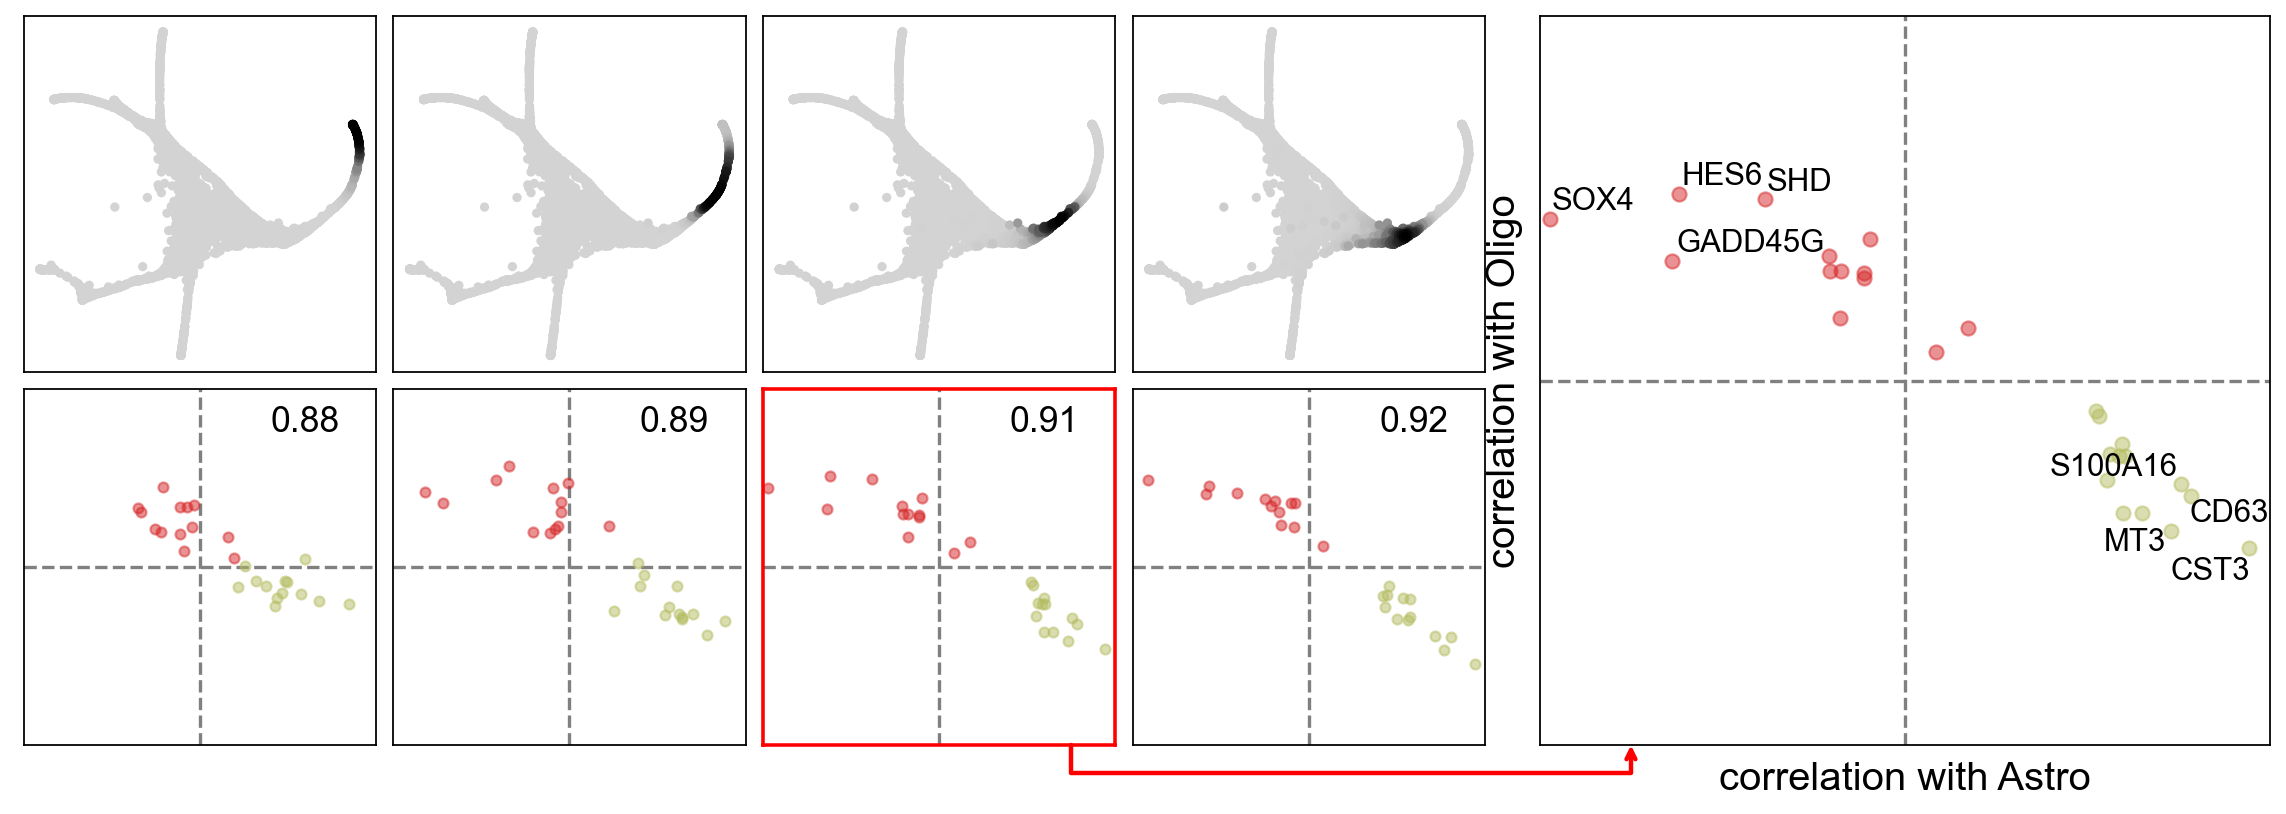

In [45]:
scf.pl.slide_cors(adata,root,miles,basis="draw_graph_fa",win_keep=range(4),focus=2)

In [46]:
scf.tl.synchro_path(adata,root,miles,w=100,n_jobs=50,n_map=100)

computing local correlations
    multi mapping permutations: 100%|██████████| 100/100 [00:36<00:00,  2.77it/s]
    finished (0:01:22) --> added 
    .uns['Progenitors->Astro<>Oligo']['synchro'], mean local gene-gene correlations of all possible gene pairs inside one module, or between the two modules.
    .obs['inter_cor Progenitors->Astro<>Oligo'], GAM fit of inter-module mean local gene-gene correlations prior to bifurcation.


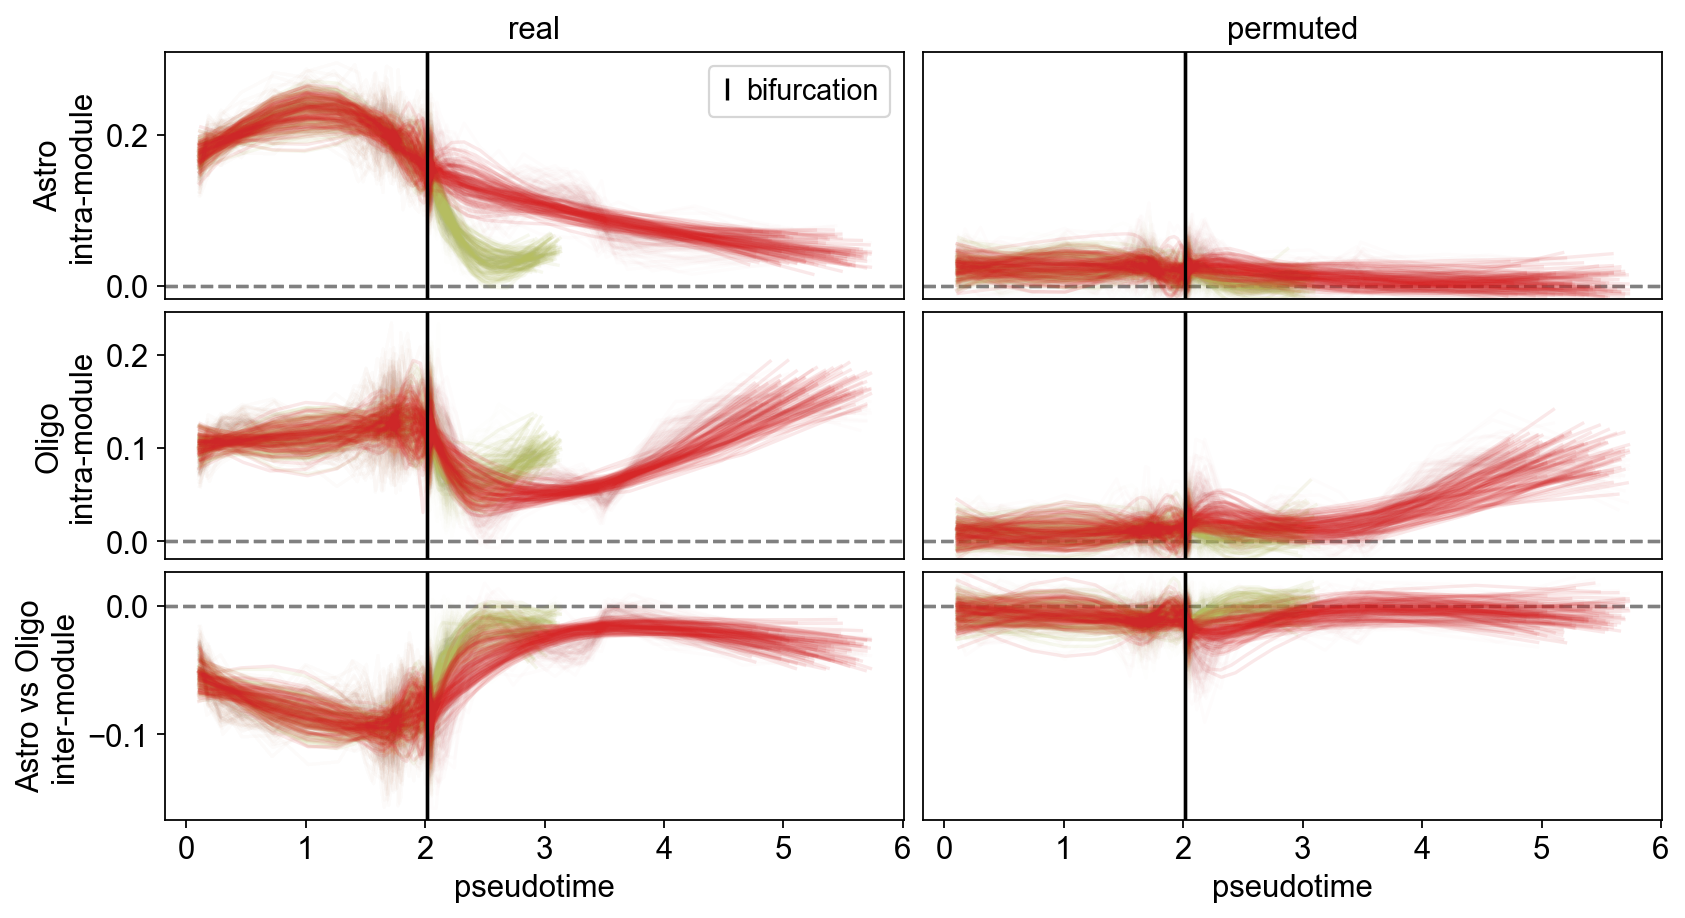

In [47]:
scf.pl.synchro_path(adata,root,miles)

<AxesSubplot:title={'center':'inter-correlation\nHypodermis<>Seam cells'}, xlabel='FA1', ylabel='FA2'>

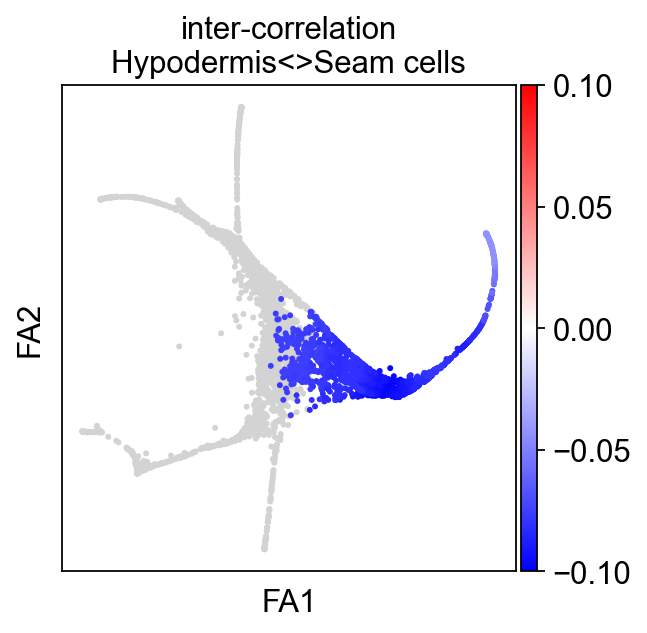

In [48]:
sc.pl.draw_graph(adata,color=f"inter_cor {root}->{'<>'.join(miles)}",cmap="bwr",
                 title="inter-correlation\nHypodermis<>Seam cells",vmax=0.1,vmin=-0.1,show=False)

In [49]:
adata.write("adata_final.h5ad")